In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from datetime import datetime

In [22]:
# read in relevant cols, convert timestamp col to datetime
cols = pd.read_csv("phq_scores_niaaa_20230715.csv", nrows=1).columns
df = pd.read_csv("phq_scores_niaaa_20230715.csv", usecols=cols[1:])
#df['timestamp'] = df['timestamp'].apply(lambda x: datetime.strptime(x.split('.')[0], '%Y-%m-%dT%H:%M:%S'))
#df['timestamp'] = df['timestamp'].apply(lambda x: np.datetime64(x))
df['timestamp'] = df['timestamp'].apply(lambda x: pd.to_datetime(x))

# fix typos
df.replace({'C102AUD':'CF102AUD','Mm095AUD':'MM095AUD','CM085 AUD':'CM085AUD','Mf087AUD':'MF087AUD','Mm119AUD':'MM119AUD'}, inplace=True)

# remove invalid pts
nonvalid = ['CF270AUD','CF285AUD','CF286AUD','CM229AUD','CM236AUD','CM237AUD','CM251AUD','CM256AUD','CM271AUD','CM287AUD','CM301AUD','MF246AUD','MF249AUD','MF272AUD','MM216AUD','MM250AUD','MM260AUD','MM282AUD','MM293AUD','MM290AUD', 'CF241AUD', 'CF231AUD']
#drop_list = ['CM236AUD','CM256AUD','MM293AUD']
df = df.loc[~df['subject_id'].isin(nonvalid)].reset_index().drop(columns=['index'])
#drop_indices = df.loc[df['subject_id'].isin(nonvalid),'subject_id'].index
#df.drop(drop_indices, inplace=True)

df

,user_id,subject_id,timestamp,survey_name,phq_total
0,us-east-1:08d3bffe-b8c9-4b27-9e77-ce293a58a38b,MM028AUD,2021-12-09 13:19:15.649000-07:00,phq8,9
1,us-east-1:08d3bffe-b8c9-4b27-9e77-ce293a58a38b,MM028AUD,2021-12-23 10:51:45.087000-07:00,phq8,6
2,us-east-1:08d3bffe-b8c9-4b27-9e77-ce293a58a38b,MM028AUD,2022-01-07 19:22:33.058000-07:00,phq8,9
3,us-east-1:08d3bffe-b8c9-4b27-9e77-ce293a58a38b,MM028AUD,2022-01-19 11:58:12.435000-07:00,phq8,6
4,us-east-1:08d3bffe-b8c9-4b27-9e77-ce293a58a38b,MM028AUD,2022-02-03 13:07:03.003000-07:00,phq8,8
...,...,...,...,...,...
673,us-east-1:f8452db9-2ae8-4b94-8dd4-ff8ea21d3235,MF035AUD,2022-03-20 22:08:50.675000-06:00,phq8,6
674,us-east-1:fc5296f1-c47a-42c6-93ef-13e9d3a8af5c,CM059AUD,2021-12-30 22:01:00.356000-07:00,phq8,5
675,us-east-1:fc5296f1-c47a-42c6-93ef-13e9d3a8af5c,CM059AUD,2022-01-13 14:48:58.558000-07:00,phq8,2
676,us-east-1:fc5296f1-c47a-42c6-93ef-13e9d3a8af5c,CM059AUD,2022-01-27 08:51:52.652000-07:00,phq8,3


In [23]:
# read in basline date reference
df_ref = pd.read_csv("HealthRhythmsAUDCTSI-BaselineDates_DATA_2023-07-27_1631.csv")
#df_ref.dropna(inplace=True)
df_ref = df_ref.loc[df_ref['record_id'] != 'PM142AUD']
#df_ref['visit_date'] = df_ref['visit_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
#df_ref['visit_date'] = df_ref['visit_date'].apply(lambda x: np.datetime64(x))
df_ref['visit_date'] = df_ref['visit_date'].apply(lambda x: pd.to_datetime(x))

In [24]:
def get_study_week(row):
    baseline_date = pd.to_datetime(df_ref.loc[df_ref['record_id']==row['subject_id'],['visit_date']].values[0][0]).date()
    date_of_interest = row['timestamp'].date()
    td = date_of_interest-baseline_date
    return round(td.days/7,0), td.days

#get_study_week(df.iloc[0])

In [25]:
for i, row in df.iterrows():
    try:
        df.loc[df.index[i],"study_week"], df.loc[df.index[i],"study_days"] = get_study_week(row)
    except:
        df.loc[df.index[i],"study_week"], df.loc[df.index[i],"study_days"] = np.nan, np.nan

In [26]:
df.loc[df['study_days'].isna()]

,user_id,subject_id,timestamp,survey_name,phq_total,study_week,study_days
289,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-02-18 14:11:55.782000-07:00,phq8,4,NaN,NaN
290,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-03-03 10:11:52.588000-07:00,phq8,6,NaN,NaN
291,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-03-20 09:53:10.367000-06:00,phq8,5,NaN,NaN
292,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-04-02 14:06:46.940000-06:00,phq8,3,NaN,NaN
293,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-04-16 14:41:25.768000-06:00,phq8,2,NaN,NaN
294,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-04-30 16:46:49.444000-06:00,phq8,4,NaN,NaN
295,us-east-1:738c17d3-a1e2-434c-b982-357b48768331,CM106AUD,2022-05-14 17:41:51.146000-06:00,phq8,1,NaN,NaN
574,us-east-1:ddb6b068-a2df-49a7-9720-c9ad39e2fb55,CF333AUD,2023-05-26 13:44:49.198000-04:00,phq8,5,NaN,NaN
575,us-east-1:e3423726-2124-4fba-ae5d-449c8abab021,CM250AUD,2023-01-05 09:07:49.858000+01:00,phq8,10,NaN,NaN
576,us-east-1:e3423726-2124-4fba-ae5d-449c8abab021,CM250AUD,2023-01-13 23:18:30.925000+01:00,phq8,6,NaN,NaN


In [27]:
test1 = df.loc[(df['study_week']==0) | (df['study_week']==1),'subject_id'].values

<Axes: title={'center': 'No. PHQ8 Completed (pre-2/6/23)'}, xlabel='Week', ylabel='Count'>

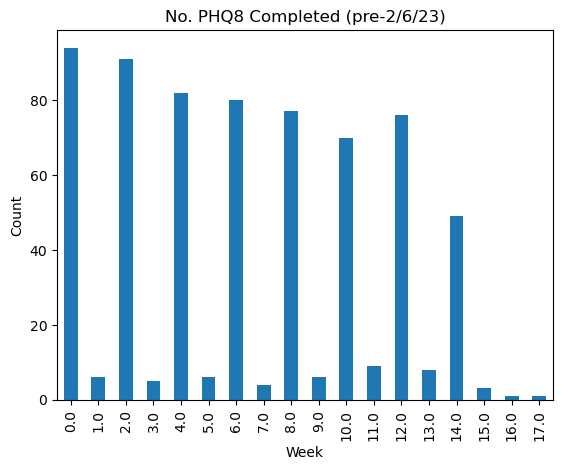

In [28]:
count_by_week = df['study_week'].value_counts()
count_by_week.sort_index(inplace=True)
count_by_week.plot(kind='bar', xlabel="Week", ylabel='Count', title='No. PHQ8 Completed (pre-2/6/23)')

In [29]:
# count_by_day = df['study_days'].value_counts()
# count_by_day.sort_index(inplace=True)
# count_by_day.plot(kind='bar')

In [30]:
observed_count = count_by_week.reset_index().rename(columns={'index':'week','study_week':'count'})
for i, row in observed_count.iterrows():
    if i<14:
        if i%2==0:
            observed_count.loc[observed_count.index==i,'count'] = observed_count.loc[observed_count.index==i,'count'].values[0] + observed_count.loc[observed_count.index==i+1,'count'].values[0]
        elif i%2!=0:
            observed_count.drop(i,inplace=True)
    elif i==14:
        observed_count.loc[observed_count.index==i,'count'] = observed_count.loc[observed_count.index==i,'count'].values[0] + observed_count.loc[observed_count.index==i+1,'count'].values[0] 
        + observed_count.loc[observed_count.index==i+2,'count'].values[0] + observed_count.loc[observed_count.index==i+3,'count'].values[0]
    else:
        observed_count.drop(i,inplace=True)


observed_count

,week,count
0,0.0,100
2,2.0,96
4,4.0,88
6,6.0,84
8,8.0,83
10,10.0,79
12,12.0,84
14,14.0,52


In [31]:
observed_count['week'] = observed_count['week'].replace({0:'baseline',2:'week_2',4:'week_4',6:'week_6',8:'week_8',10:'week_10',12:'week_12',14:'week_14'})
observed_count

,week,count
0,baseline,100
2,week_2,96
4,week_4,88
6,week_6,84
8,week_8,83
10,week_10,79
12,week_12,84
14,week_14,52


In [32]:
# get events pre feb6
events_pre = pd.read_csv('events_pre_20230206.csv')
expected_count = events_pre['event_name'].value_counts().reset_index().rename(columns={'index':'event_name','event_name':'count'})
expected_count.drop([1,3,5,7,9,11,13],inplace=True)
expected_count

,event_name,count
0,baseline,105
2,week_2,99
4,week_4,93
6,week_6,89
8,week_8,87
10,week_10,85
12,week_12,83
14,week_14,82


In [57]:
summary_counts = expected_count.merge(observed_count, left_on='event_name', right_on='week', suffixes=['_exp','_obs']).drop(columns='week')
summary_counts['proportion'] = summary_counts['count_obs'] / summary_counts['count_exp']
summary_counts['labels'] = summary_counts['count_obs'].map(str) + '/' + summary_counts['count_exp'].map(str)
summary_counts.set_index('event_name',inplace=True)
summary_counts

,count_exp,count_obs,proportion,labels
event_name,,,,
baseline,105,100,0.952381,100/105
week_2,99,96,0.969697,96/99
week_4,93,88,0.946237,88/93
week_6,89,84,0.943820,84/89
week_8,87,83,0.954023,83/87
week_10,85,79,0.929412,79/85
week_12,83,84,1.012048,84/83
week_14,82,52,0.634146,52/82


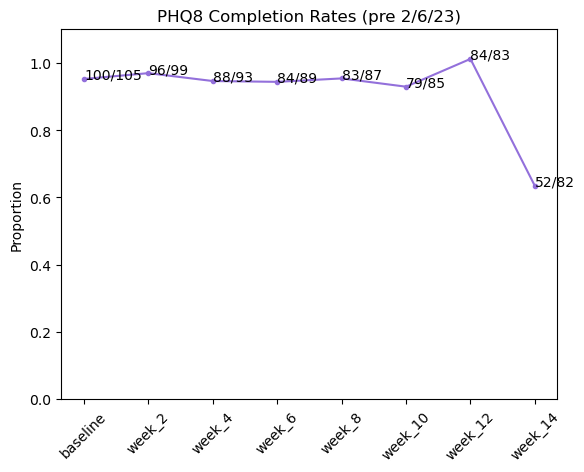

In [68]:
# plot phq8 completion rates
fig2, ax2 = plt.subplots()

ax2.plot(summary_counts.loc[:,['proportion']], linestyle='-', color='mediumpurple', marker='.')

for i, txt in enumerate(summary_counts['labels']):
    ax2.annotate(txt, (summary_counts.loc[:,['labels',]].index.values[i], summary_counts.loc[:,['proportion',]].values[i]))

plt.ylim([0,1.1])
#plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.title('PHQ8 Completion Rates (pre 2/6/23)')
plt.ylabel('Proportion')
plt.show()

In [34]:
test2 = events_pre['record_id'].unique()

In [35]:
len(test1)

100

In [36]:
len(test2)

105

In [37]:
# prints the missing and additional elements in list2
print("Missing values in Redcap list:", (set(test1).difference(test2)))
print("Additional values in Redcap list:", (set(test2).difference(test1)))
 
# prints the missing and additional elements in list1
print("Missing values in HR's list:", (set(test2).difference(test1)))
print("Additional values in HR's list:", (set(test1).difference(test2)))

Missing values in Redcap list: set()
Additional values in Redcap list: {'CF021AUD', 'MM145AUD', 'MM291AUD', 'PM142AUD', 'CM085AUD', 'CM083AUD', 'CF276AUD', 'CF026AUD', 'MM106AUD'}
Missing values in HR's list: {'CF021AUD', 'MM145AUD', 'MM291AUD', 'PM142AUD', 'CM085AUD', 'CM083AUD', 'CF276AUD', 'CF026AUD', 'MM106AUD'}
Additional values in HR's list: set()


In [71]:
# get all events pre feb6
all_events_pre = pd.read_csv('all_events_pre_20230206.csv')
all_expected_count = all_events_pre['event_name'].value_counts().reset_index().rename(columns={'index':'event_name','event_name':'count'})
all_expected_count.drop([1,3,5,7,9,11,13],inplace=True)
all_expected_count

,event_name,count
0,baseline,108
2,week_2,101
4,week_4,95
6,week_6,92
8,week_8,90
10,week_10,89
12,week_12,87
14,week_14,86


In [72]:
all_summary_counts = all_expected_count.merge(observed_count, left_on='event_name', right_on='week', suffixes=['_exp','_obs']).drop(columns='week')
all_summary_counts['proportion'] = all_summary_counts['count_obs'] / all_summary_counts['count_exp']
all_summary_counts['labels'] = all_summary_counts['count_obs'].map(str) + '/' + all_summary_counts['count_exp'].map(str)
all_summary_counts.set_index('event_name',inplace=True)
all_summary_counts

,count_exp,count_obs,proportion,labels
event_name,,,,
baseline,108,100,0.925926,100/108
week_2,101,96,0.950495,96/101
week_4,95,88,0.926316,88/95
week_6,92,84,0.913043,84/92
week_8,90,83,0.922222,83/90
week_10,89,79,0.887640,79/89
week_12,87,84,0.965517,84/87
week_14,86,52,0.604651,52/86


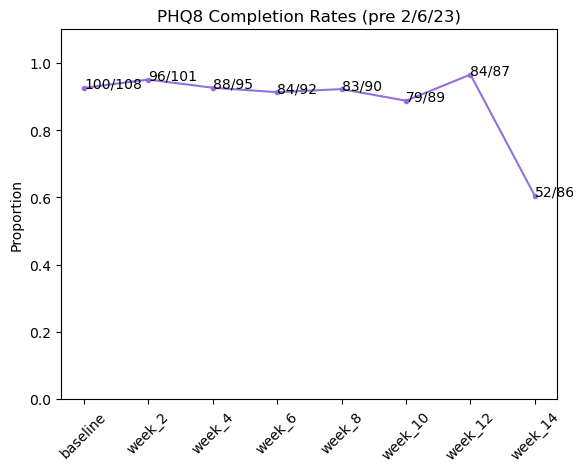

In [73]:
# plot phq8 completion rates
fig2, ax2 = plt.subplots()

ax2.plot(all_summary_counts.loc[:,['proportion']], linestyle='-', color='mediumpurple', marker='.')

for i, txt in enumerate(all_summary_counts['labels']):
    ax2.annotate(txt, (all_summary_counts.loc[:,['labels',]].index.values[i], all_summary_counts.loc[:,['proportion',]].values[i]))

plt.ylim([0,1.1])
#plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.title('PHQ8 Completion Rates (pre 2/6/23)')
plt.ylabel('Proportion')
plt.show()